# Análise de Desempenho de Modelos de Machine Learning

In [21]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

#AUTHENTICATE VALUES
SUBSCRIPTION = "1f51a68b-69d8-4818-bf63-7c5e10b81967"
RESOURCE_GROUP = "luiz.victor.dev-rg"
WS_NAME = "tcc-tests"

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION,
    resource_group_name=RESOURCE_GROUP,
    workspace_name=WS_NAME,
)

In [22]:
results = ml_client.data.get(name="results", version="v1")
print(f"Data to train asset URI: {results.path} - name: results")

Data to train asset URI: azureml://subscriptions/1f51a68b-69d8-4818-bf63-7c5e10b81967/resourcegroups/luiz.victor.dev-rg/workspaces/tcc-tests/datastores/workspaceblobstore/paths/LocalUpload/dcdf98e3121869752d1e0f7543bf265b/results.csv - name: results


In [23]:

import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
RESULT_PATH = '/home/azureuser/cloudfiles/code/Users/luiz.victor.dev/tcc_experiments_az_ml/results/results.csv'
df = pd.read_csv(RESULT_PATH)

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()


In [24]:
def plot_accuracy_vs_features(df):
    models = df['Modelo'].unique()
    for model in models:
        model_data = df[df['Modelo'] == model].sort_values(by='Quantidade de Features')
        plt.figure(figsize=(10, 6))
        plt.plot(model_data['Quantidade de Features'], model_data['Acurácia'], marker='o')
        for i, txt in enumerate(model_data['Acurácia']):
            plt.annotate(f"{txt:.2f}", (model_data['Quantidade de Features'].iloc[i], model_data['Acurácia'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f'Acurácia vs Quantidade de Features - {model}')
        plt.xlabel('Quantidade de Features')
        plt.ylabel('Acurácia')
        plt.grid(True)
        plt.show()

In [25]:
def plot_other_metrics(df):
    models = df['Modelo'].unique()
    metrics = ['F1 Score', 'Precision', 'Recall']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for model in models:
            model_data = df[df['Modelo'] == model].sort_values(by='Quantidade de Features')
            plt.plot(model_data['Quantidade de Features'], model_data[metric], marker='o', label=model)
            for i, txt in enumerate(model_data[metric]):
                plt.annotate(f"{txt:.2f}", (model_data['Quantidade de Features'].iloc[i], model_data[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f'{metric} vs Quantidade de Features')
        plt.xlabel('Quantidade de Features')
        plt.ylabel(metric)
        plt.grid(True)
        plt.legend()
        plt.show()

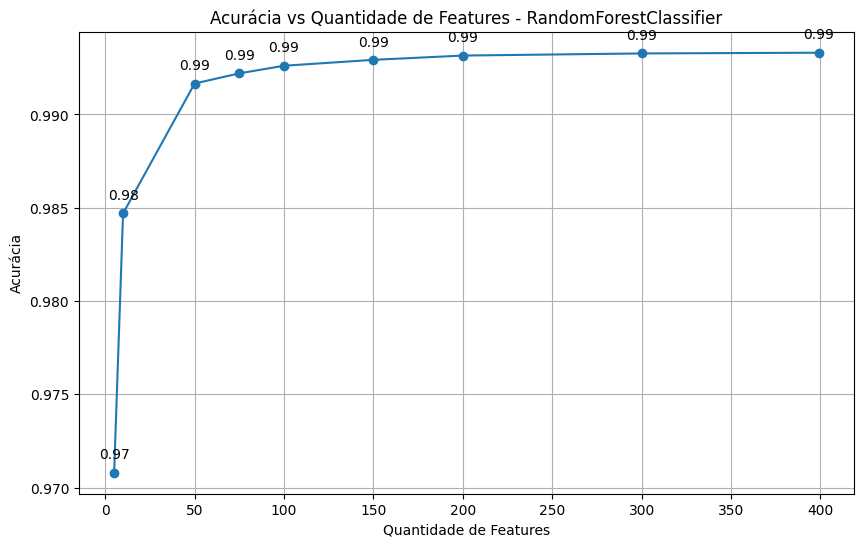

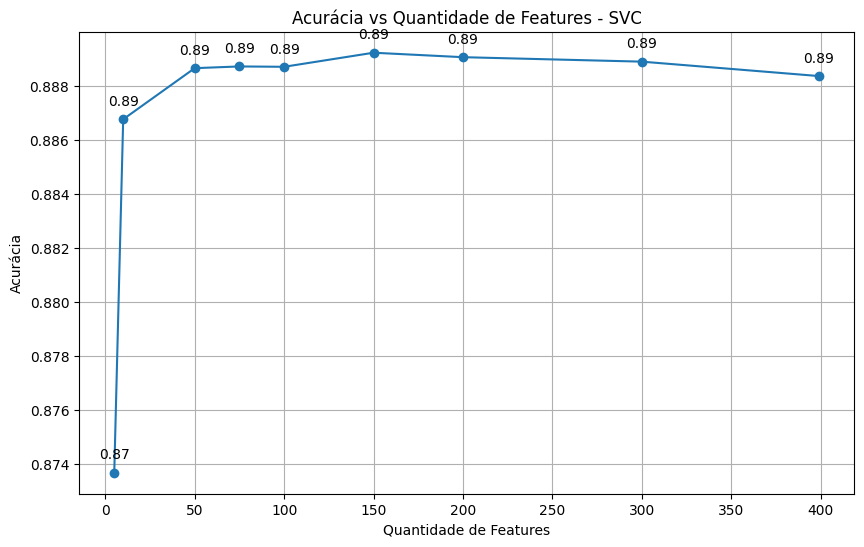

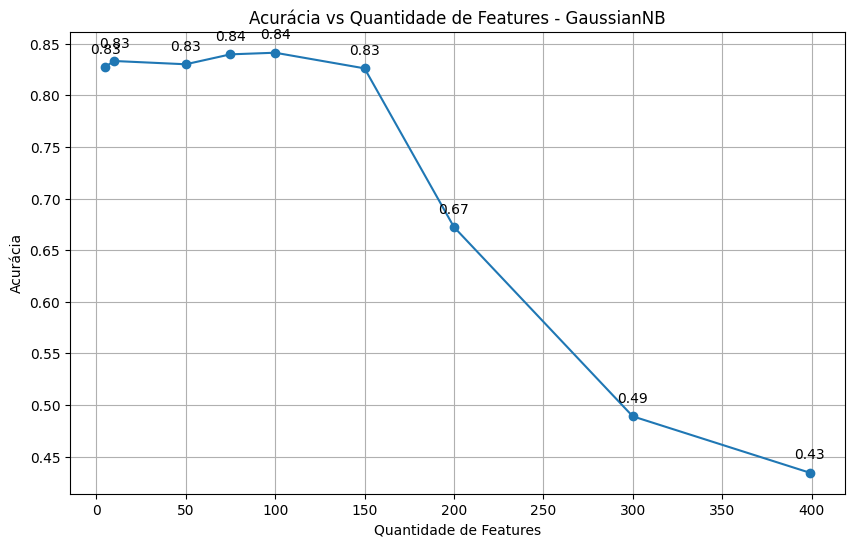

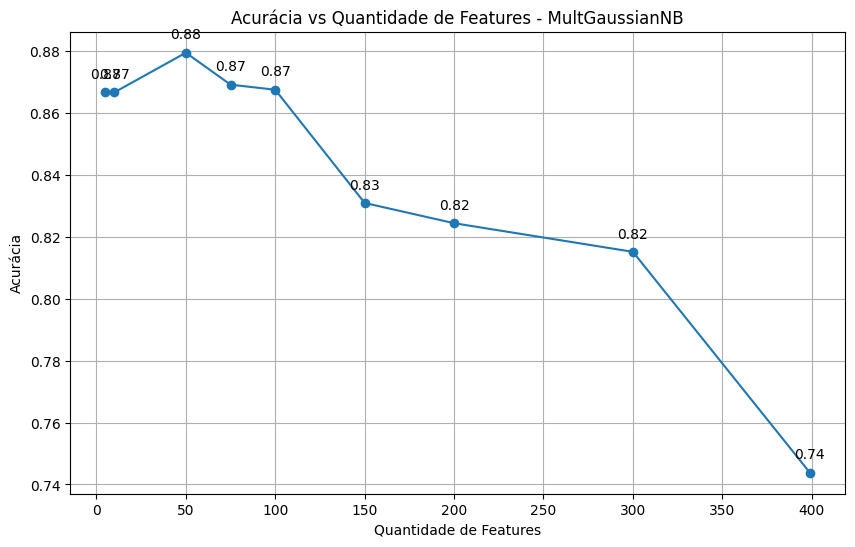

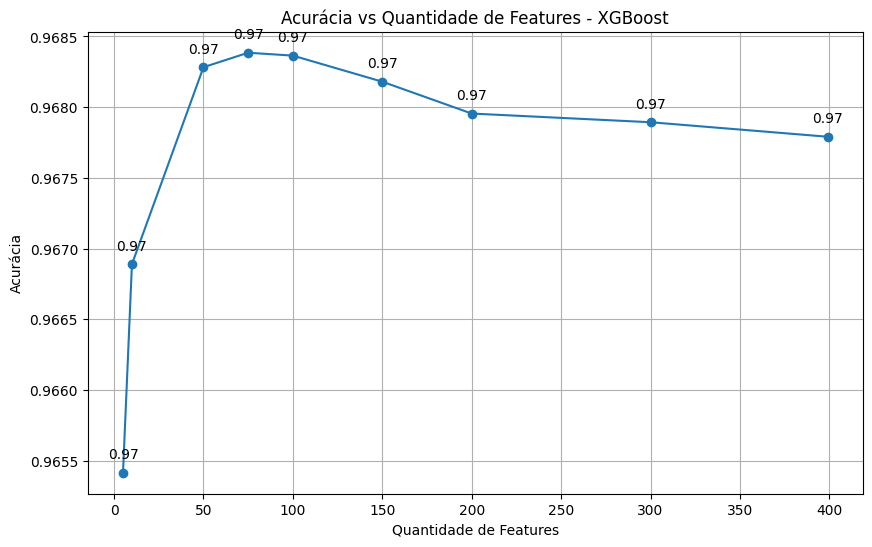

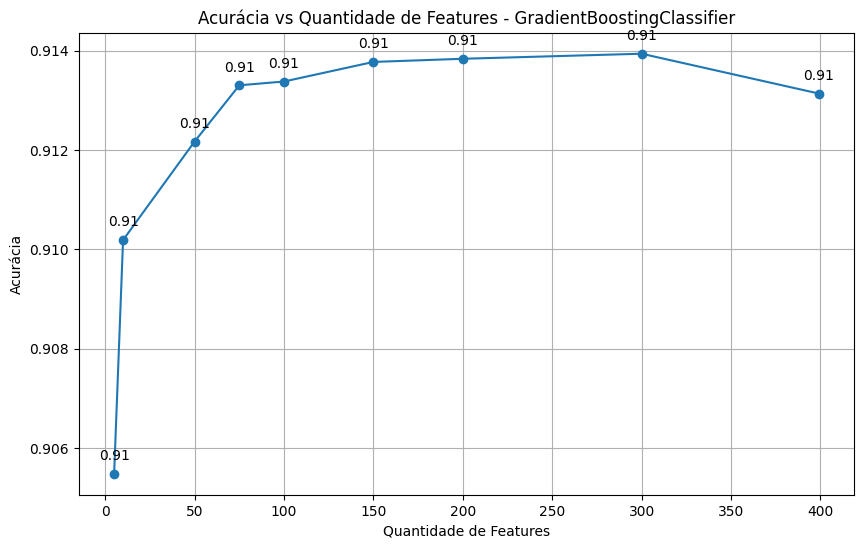

In [26]:
# Plotar acurácia vs quantidade de features para cada modelo com eixos trocados
plot_accuracy_vs_features(df)

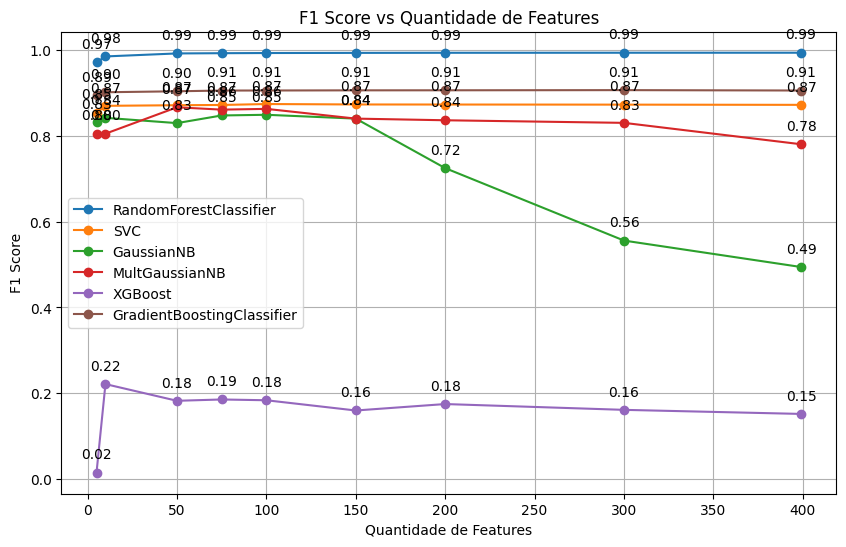

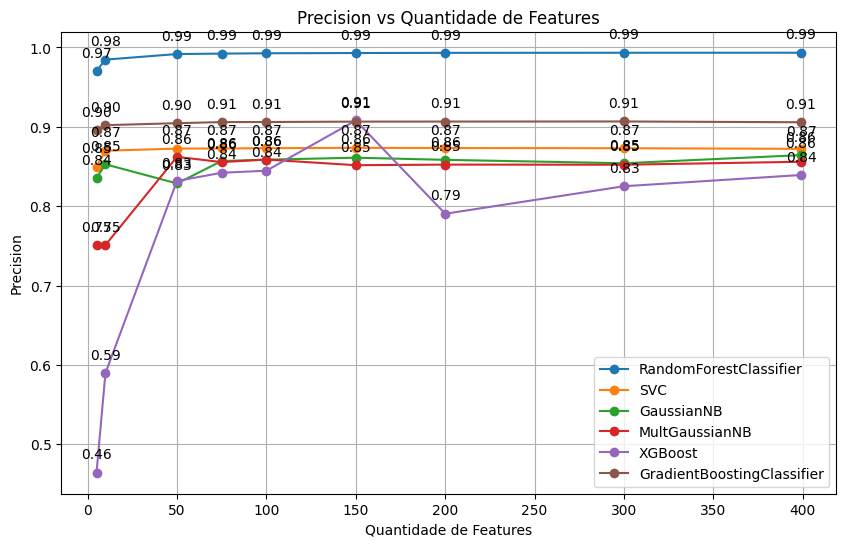

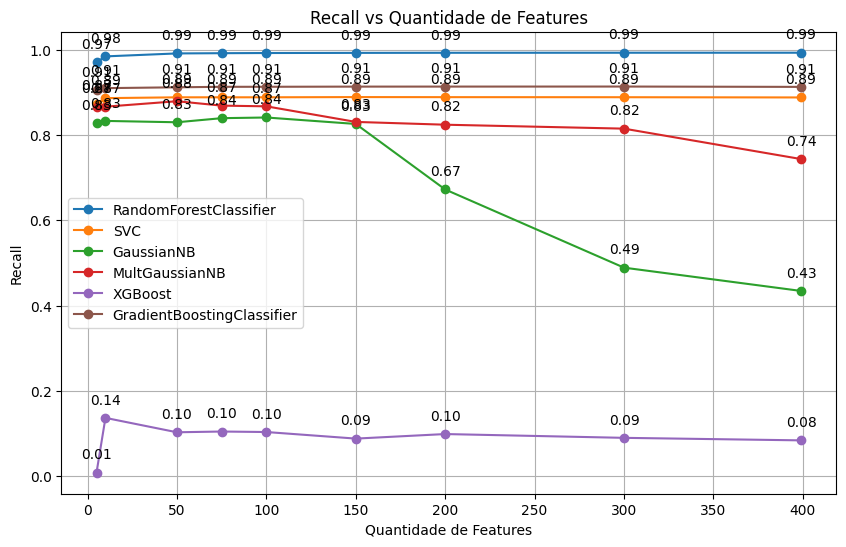

Bad pipe message: %s [b'\xbe\xee\xe2,\x16<\x00\n\x15^\x8d\x0e\xf1L\xef\xbbs\xf9 \x17\x83\xc2\xe2\xa3u\x8f\xd5I\x9ckp\xce\xcb\xf2\x0733\xd3\xf8\xb5\xd4\xe1\xec\xee\xff4\x1a\xa5EK\xe9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$']
Bad pipe message: %s [b'#\xa7\xf7D<*k.\xda\x8e\xb1\xa8BE\x80:\xe2&\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0']
Bad pipe message: %s [b"w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x

In [27]:
# Plotar outras métricas interessantes com eixos trocados
plot_other_metrics(df)